In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from My_functions import reverse_colourmap 


In [2]:
# PARAMETERS
prefix = "" #"_no_sinking" #
save_figs = 0
save_path = "/data/rd_exchange/mbelharet/nemo_4-0_fabm_pisces/figures/"


In [3]:
files_home = "./"

filename_fabm = "C1D_PAPA_fabm" + prefix + "_1ts_20100615_20110614_ptrc_T.nc"  
filename = "C1D_PAPA" + prefix + "_1ts_20100615_20110614_ptrc_T.nc"

In [4]:
data_fabm = xr.open_dataset(files_home + "/" + filename_fabm).isel(x=1, y=1)  
data = xr.open_dataset(files_home + "/" + filename).isel(x=1, y=1)

In [5]:
##### depth of vertical levels ######
depth = data['deptht'].to_numpy()
##### time counter ##################
time_counter = data['time_counter'].to_numpy()

In [6]:
flags = ["_fabm", ""]

conv = [1 , 1]

#print("nano" + flag + "= data" + flag +"[\"nano_phyto\"].to_numpy()")
ncVars = ["nano_phyto", "diatoms" , "microzoo" , "mesozoo", "NO3", "DOM",
          "NH4", "PO4", "Si", "Fer", "POC", "GOC",
          "DSi", "DFe", "phyFe", "GOMFe", "POMFe", "phyCh",
           "DCh", "GOMCal", "CarDic", "CarAlk", "GOMSi", "O2"]

In [7]:
##### Pisces variables #############
id = -1
for flag in flags:
    id+=1
    for ncVar in ncVars:
        exec(ncVar + flag + "= data" + flag +"[\"" + ncVar + "\"].to_numpy() * conv[id]")

In [8]:
# Depth parameters
depth_min = 0
depth_max = 1000

dep_min_id = np.asarray(np.where(depth>=depth_min))[0,0]
dep_max_id = np.asarray(np.where(depth<=depth_max))[0,-1]

dep = depth[dep_min_id:dep_max_id]

# Time Parameters
ndt_min = 0
ndt_max = 24 * 365

In [9]:
def plot_vertical_profiles(variables):
    fig = plt.figure(figsize=(10,8))
  
    nb = int(np.ceil(len(variables)/3))
    cptr = 0
    for var in variables:
        cptr+=1
        ax = fig.add_subplot(nb,3,cptr)
        
        for flag in flags:
            ldict = {}
            exec("v =" +  var + flag + "[ndt_min:ndt_max,dep_min_id:dep_max_id]", globals(),ldict)
            v = ldict['v']
            v_mean = np.mean(v,axis=0)
            
            plt.plot(v_mean,-dep)

        plt.xticks(fontsize=7)
        plt.yticks(fontsize=7)
        plt.title(var , fontsize=12) 
        plt.xlabel("$µmol\ L^{-1}$",fontsize=8)
        plt.ylabel("Depth (m)",fontsize=8)
        plt.legend(["with FABM", "standard"])

    # Space between subplots
    fig.tight_layout(pad=1.5)

            
            

In [10]:
def plot_vertical_anomaly(variables):
    fig = plt.figure(figsize=(10,8))
  
    nb = int(np.ceil(len(variables)/3))
    cptr = 0
    for var in variables:
        cptr+=1
        ax = fig.add_subplot(nb,3,cptr)
        
        ldict = {}
        exec("v_fabm =" +  var + "_fabm[ndt_min:ndt_max,dep_min_id:dep_max_id]", globals(),ldict)
        v_fabm = ldict['v_fabm']
        exec("v =" +  var + "[ndt_min:ndt_max,dep_min_id:dep_max_id]", globals(),ldict)
        v = ldict['v']
            
        v_mean = 100*(np.mean(v_fabm,axis=0) - np.mean(v,axis=0)) / np.mean(v,axis=0)
            
        plt.plot(v_mean,-dep)

        plt.xticks(fontsize=7)
        plt.yticks(fontsize=7)
        plt.title(var , fontsize=12) 
        plt.xlabel("Anomaly (%)",fontsize=8)
        plt.ylabel("Depth (m)",fontsize=8)
        

    # Space between subplots
    fig.tight_layout(pad=1.5)

            

In [11]:
anomaly = 0

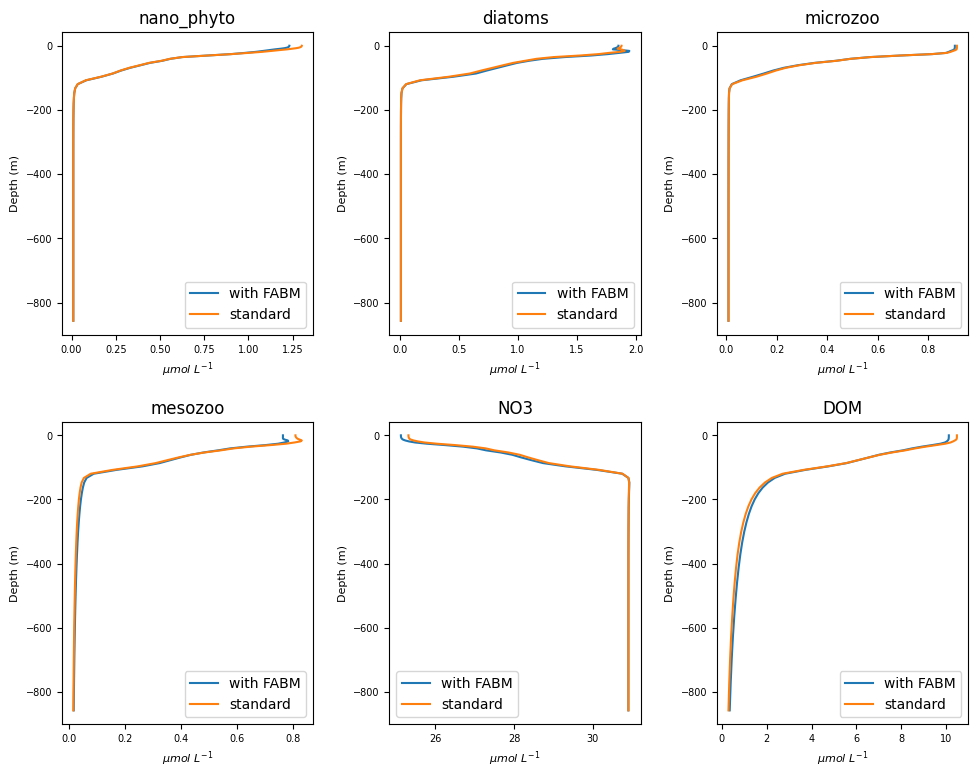

In [12]:
variables1 = ncVars[0:6]
if(anomaly):
    plot_vertical_anomaly(variables1)
else:
    plot_vertical_profiles(variables1)

if(save_figs):
    plt.savefig(save_path + "vertical_profiles_1" + prefix + ".png")

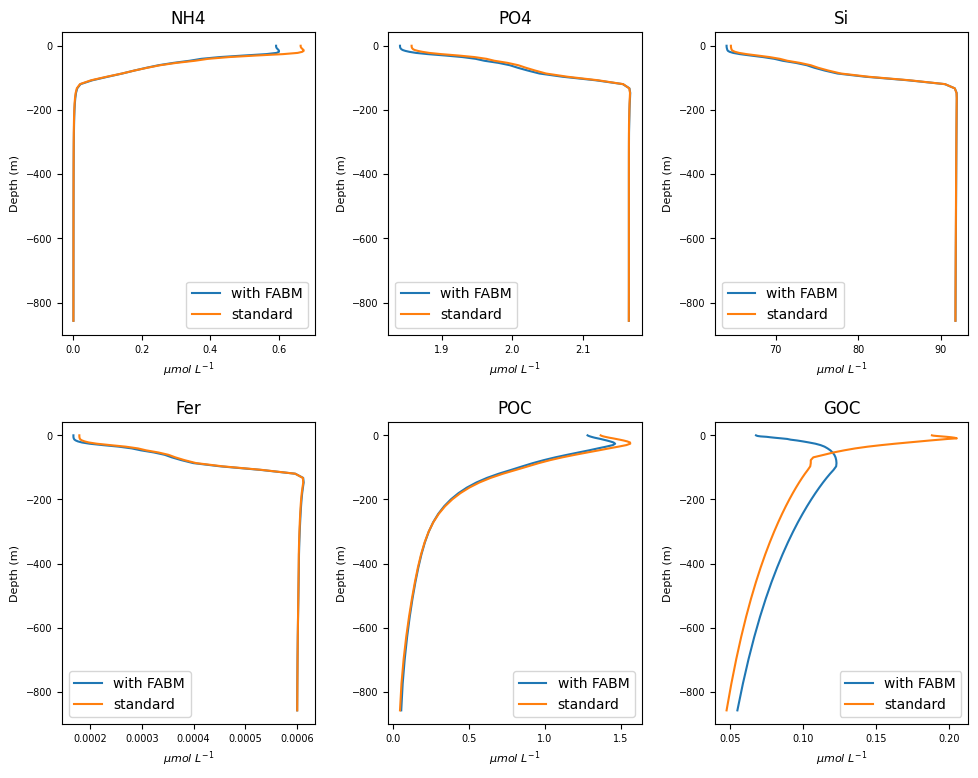

In [13]:
variables2 = ncVars[6:12]

if(anomaly):
    plot_vertical_anomaly(variables2)
else:
    plot_vertical_profiles(variables2)
    
if(save_figs):
    plt.savefig(save_path + "vertical_profiles_2" + prefix + ".png")

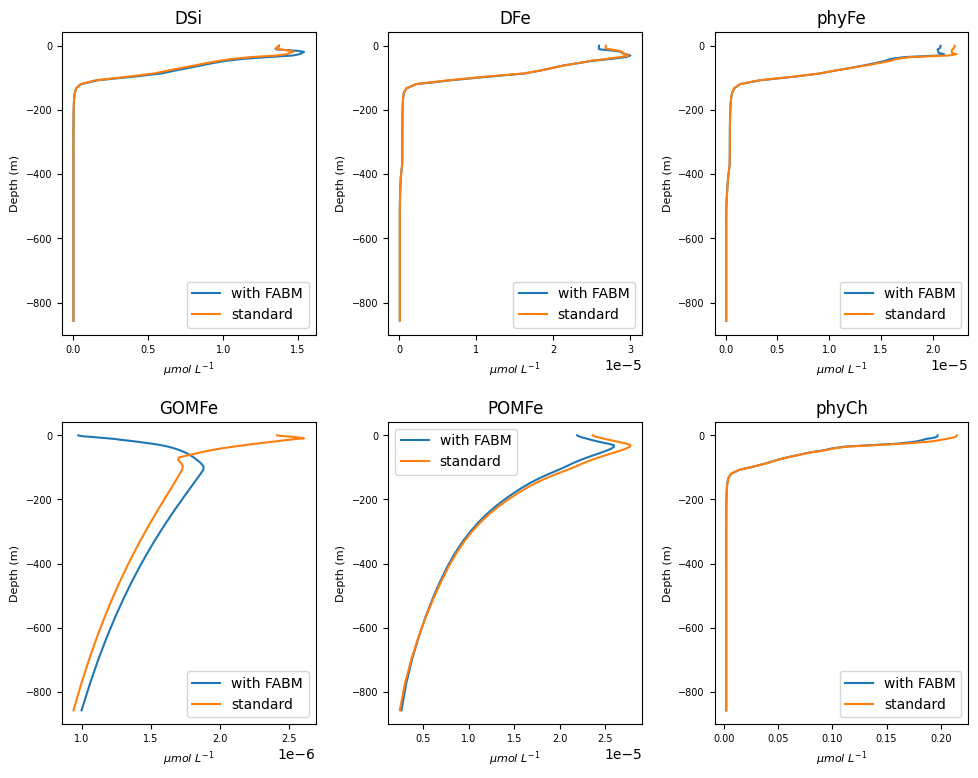

In [14]:
variables3 = ncVars[12:18]

if(anomaly):
    plot_vertical_anomaly(variables3)
else:
    plot_vertical_profiles(variables3)

if(save_figs):
    plt.savefig(save_path + "vertical_profiles_3" + prefix + ".png")

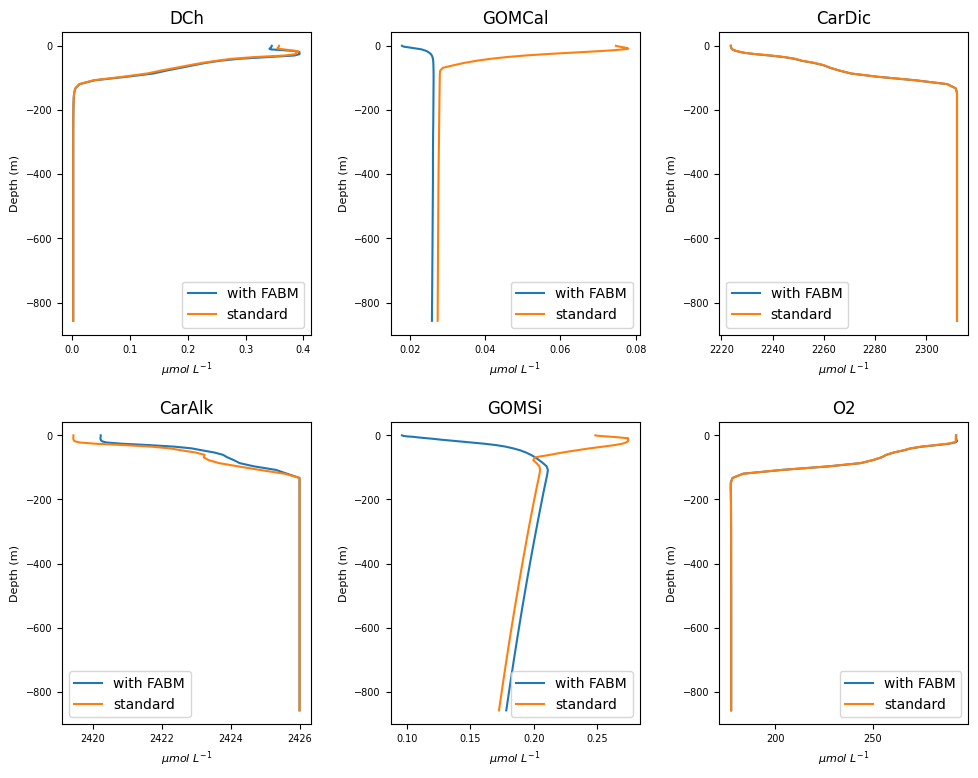

In [15]:
variables4 = ncVars[18:24]

if(anomaly):
    plot_vertical_anomaly(variables4)
else:
    plot_vertical_profiles(variables4)

if(save_figs):
    plt.savefig(save_path + "vertical_profiles_4" + prefix + ".png")